In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
## Adaline

class Adaline(object):
    '''
        적응형 선형 뉴런 분류기 
        
        매개변수 = eta(학습률) , n_iter( 훈련 횟수 ) , random_state:int ( 가중치 무작위로 초기화할 난수 생성 시드)
        
        속성 = w_ = 1d-array ( 학습 가중치), cost_ = list ( 에포크마다 누적된 비용함수의 제곱합 )
        
    '''

    def __init__ (self, eta=0.01 , n_iter=10 , random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self , X ,y): # X , y 는 각각 100행을 갖는 array (= 100개의 샘플 )
        """Fitting training data
        
            Parameters 
            X = shape[n_sample , n_feature ] training vectors
            y = Target values
            
            Return 
            self = object 객체
        """
        
        rgen = np.random.RandomState(self.random_state) # 일반화 ( self.random_state 값을 받음)
        # 평균이 0이고 분산이 0.01 인 가중치 초기화. 
        self.w_ = rgen.normal( loc=0.0 , scale = 0.01 , size = 1+X.shape[1] )
        self.cost_ = []
        
        for _ in range(self.n_iter): # 10번 돌리고 에러를 찾고 에러를 찾는다면 그 에러를 업데이트 함
            
            net_input = self.net_input(X)
            output = self.activation(net_input)
            error = ( y - output) 
            # 모든 샘플의 에러 와 모든샘플의 첫번째 feature 와 내적함. 
            self.w_[1:] += self.eta * X.T.dot(error) # self.eta * np.dot(X.T , error)
            self.w_[0] += self.eta * error.sum() 
            
            cost = (error**2).sum()/2.0
            self.cost_.append(cost)
            
        return self

#  퍼셉트론 
#             for xi , target in zip(X,y): # update 룰 
#                 update = self.eta * (target-self.predict(xi))
#                 self.w_[1:] += update*xi  # 하나의 feature 에 대한 가중치 업데이트
#                 self.w_[0] += update      # 편향(상수)에 대한 가중치 업데이트
#                 errors += int(update != 0.0) # 에러 횟수 
#             self.errors_.append(errors)
#         return self
            
    def net_input ( self , X  ): # x*w 내적 
        " calculate net input"
        return np.dot(X,self.w_[1:]+self.w_[0]) # w_[0] 은 편향 
    
    def activation( self , X):
        " 선형 activation X입력하면 X 리턴"
        return X
    
    def predict(self , X): # 
        "return class label after unit step"
        return np.where(self.activation(X) >=0.0 , 1 , -1)

## 만약 학습률이 달라진다면 ? 
    - eta =  0.1 일때 ,   eta = 0.00001 일 때

In [20]:
# 붓꽃 데이터를 퍼셉트론으로 분류하기

df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y=df.iloc[0:100, 4].values
y=np.where(y=='Iris-setosa', -1, 1)
X=df.iloc[0:100, [0,2]].values

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'log(Sum-squared-error)')

Text(0.5, 1.0, 'Adaline - Learning rate 0.01')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'log(Sum-squared-error)')

Text(0.5, 1.0, 'Adaline - Learning rate 0.00001')

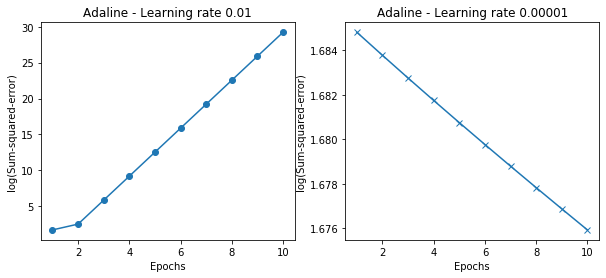

In [21]:
fig , ax = plt.subplots( nrows=1 , ncols=2 , figsize=(10,4))

# 학습치 0.01
adal = Adaline( n_iter=10 , eta=0.01).fit(X,y)
ax[0].plot(range(1, len(adal.cost_)+1), np.log10(adal.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

# 학습치 0.00001
adal_2 = Adaline( n_iter=10 , eta=0.00001).fit(X,y)
ax[1].plot(range(1, len(adal_2.cost_)+1), np.log10(adal_2.cost_), marker='x')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.00001')

plt.show()

In [8]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# 에러의 크기를 조절하기위해 스케일 조정하는 방법이 있다. 
# 스케일 조정 =  특성을 표준화 ( 값 - 평균 / 분산 )

X_std = np.copy(X)
X_std[ : ,0] = (X[:,0]- X[:,0])/ X[:,0].std()
X_std[ : ,1] = (X[:,1]- X[:,1])/ X[:,1].std()

In [10]:
ada = Adaline( n_iter=15 , eta=0.01)
ada.fit(X_std , y)


In [11]:
# 결정 경계 그래프 함수
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier, resolution=0.02):
    #setup marker generater and color map
    markers=('s','x','o','^','v')
    colors =('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min, x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z=z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y ==cl, 0], y=X[y==cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

In [12]:
plt.plot_decision_regions(X_std,y,classifier=ada)

plt.title('Adaline')
plt.Xlabel('꽃받침의 길이')
plt.ylabel('꽃잎의 길이')
plt.lengend( loc='upper left')
plt.tight_layout()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'plot_decision_regions'

## Losgistic regression

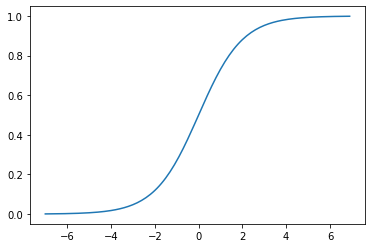

In [13]:
# 시그모이드 함수
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.show()

### 차이점

    - 비용함수 
    
    - 활성화함수
        
    - 임계함수
        아달린은 -1 또는 1 
        로지스틱은 1 또는 0

In [14]:
# 로지스틱 

class Logistic(object):
    '''
        로지스틱 회귀 분류 ( 차이점 1 =  아달린과 비용함수가 다르다)
        
        매개변수 = eta(학습률) , n_iter( 훈련 횟수 ) , random_state:int ( 가중치 무작위로 초기화할 난수 생성 시드)
        
        속성 = w_ = 1d-array ( 학습 가중치), cost_ = list ( 에포크마다 누적된   '로지스틱' 비용함수의 제곱합 )
        
    '''

    def __init__ (self, eta=0.01 , n_iter=10 , random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self , X ,y): # X , y 는 각각 100행을 갖는 array (= 100개의 샘플 )
        """Fitting training data
        
            Parameters 
            X = shape[n_sample , n_feature ] training vectors
            y = Target values
            
            Return 
            self = object 객체
        """
        
        rgen = np.random.RandomState(self.random_state) # 일반화 ( self.random_state 값을 받음)
        # 평균이 0이고 분산이 0.01 인 가중치 초기화. 
        self.w_ = rgen.normal( loc=0.0 , scale = 0.01 , size = 1+X.shape[1] )
        self.cost_ = []
        
        for _ in range(self.n_iter): # 10번 돌리고 에러를 찾고 에러를 찾는다면 그 에러를 업데이트 함
            
            net_input = self.net_input(X)
            output = self.activation(net_input)
            error = ( y - output) 
            # 모든 샘플의 에러 와 모든샘플의 첫번째 feature 와 내적함. 
            self.w_[1:] += self.eta * X.T.dot(error) # self.eta * np.dot(X.T , error)
            self.w_[0] += self.eta * error.sum() 
            
            # 아달린과 차이점 2 비용함수 계산 
            cost =- y.dot(np.log(output))-((1-y).dot(np.log(1-output)))
            self.cost_.append(cost)
            
        return self

            
    def net_input ( self , X ): # x*w 내적 
        " calculate net input"
        return np.dot(X,self.w_[1:]+self.w_[0]) # w_[0] 은 편향 
    
    def activation( self , X):
        " 선형 activation X입력하면 X 리턴"
        return 1.0 / (1.0 + np.exp(-z))
    
    def predict(self , X): # 
        "return class label after unit step"
        return np.where(self.activation(X) >=0.0 , 1 , 0)
    

In [15]:
logic = Logistic( n_iter=15 , eta=0.01)
logic.fit( X , y)

plot_decision_regions( X, y, classifier=ada)

plt.title('Adaline')
plt.Xlabel('꽃받침의 길이')
plt.ylabel('꽃잎의 길이')
plt.lengend( loc='upper left')
plt.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with shapes (100,) (140,) 